In [1]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.cluster import k_means
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

### Project

### Swiggy EDA Analysis

In [2]:
df = pd.read_csv("swiggy_all_menus_india.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Price (INR)      197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 13.6+ MB


In [4]:
df.shape

(197430, 9)

In [5]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


### Data Cleaning & Handling

In [6]:
df.isna().sum()

State              0
City               0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(6104)

### EDA & Visualization

In [8]:
df.columns

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category', 'Dish Name',
       'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

In [9]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [10]:
df["City_freq"] = df["City"].map(df["City"].value_counts())
df.head()
df["City_freq"].value_counts()

City_freq
20077    20077
10507    10507
10309    10309
10286    10286
10192    10192
10191    10191
10185    10185
10065    10065
10046    10046
10042    10042
7476      7476
5183      5183
5101      5101
5084      5084
5054      5054
5032      5032
5030      5030
5029      5029
5025      5025
5018      5018
5006      5006
5005      5005
5003      5003
5002      5002
5000      5000
3091      3091
2286      2286
2105      2105
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Price (INR)      197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
 9   City_freq        197430 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 15.1+ MB


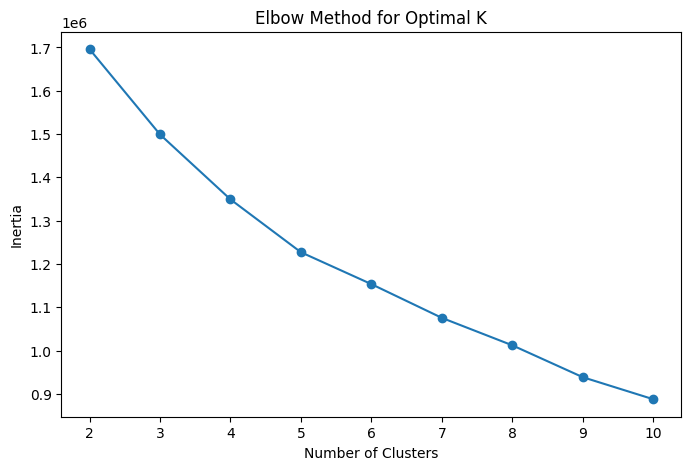

Cluster
3    73132
1    64462
2    35500
0    19803
4     4533
Name: count, dtype: int64


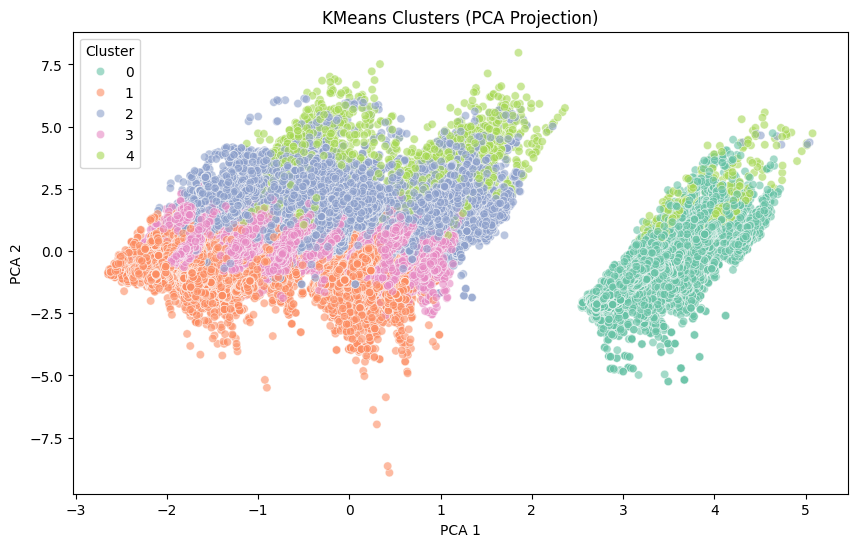

         Price (INR)    Rating  Rating Count
Cluster                                     
0         273.286254  2.877044     20.836186
1         298.011509  0.021943      0.064627
2         272.805012  3.419273     24.097831
3         245.080200  4.325829     27.802275
4         172.604681  4.385330    504.319435


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# ===============================
# 🔧 Preprocessing
# ===============================

df_encoded = df.copy()

# Frequency Encoding for high-cardinality columns
for col in ["City", "Restaurant Name", "Location", "Dish Name"]:
    df_encoded[col] = df_encoded[col].map(df_encoded[col].value_counts())

# Label Encoding for lower-cardinality categorical columns
for col in ["State", "Category"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# ===============================
# 🎯 Feature Selection
# ===============================
X = df_encoded.dropna()  # remove missing if any
X = X.drop(columns=[])   # keep all for now
X_scaled = StandardScaler().fit_transform(X)

# ===============================
# 🔍 Find Optimal K (Elbow Method)
# ===============================
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# ===============================
# 🤖 Final KMeans Model
# ===============================
k = 5  # 🔹 pick based on elbow graph
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df["Cluster"].value_counts())

# ===============================
# 📉 PCA Visualization
# ===============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set2", alpha=0.6)
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# ===============================
# 📊 Cluster Profiling
# ===============================
cluster_summary = df.groupby("Cluster")[["Price (INR)", "Rating", "Rating Count"]].mean()
print(cluster_summary)